<a href="https://colab.research.google.com/github/Prem-Chand-Dindukurthi/1999/blob/master/Copy_of_ADS_Exp_Learning_ananya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reading the file into a dataframe 

In [2]:
df=pd.read_csv('Federal_aviation_dataset.csv')
print(df.shape)
df

(83, 42)


,UPDATED,ENTRY_DATE,EVENT_DATE,EVENT_LCL_TIME,LOC_CITY_NAME,LOC_STATE_NAME,LOC_CNTRY_NAME,RMK_TEXT,EVENT_TYPE_DESC,Flight standard district,REGIST_NBR,FLT_NBR,Aircraft operator,ACFT_MAKE_NAME,ACFT_MODEL_NAME,ACFT_MISSING_FLAG,ACFT_Damage_desc,FLT_ACTIVITY,FLT_PHASE,FAR_PART,Max_Injuried_level,FATAL_FLAG,FLT_CREW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CABIN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,CBN_CRW_INJ_FATAL,CBN_CRW_INJ_UNK,PASSENGER_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GROUND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK
0,No,19-Feb-16,19-Feb-16,00:45:00Z,MARSHVILLE,North Carolina,NaN,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",Accident,FAA Charlotte FSDO-68,N61WB,NaN,NaN,BEECH,36,NaN,Unknown,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,19-Feb-16,18-Feb-16,23:55:00Z,TAVERNIER,Florida,NaN,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,Incident,FAA Miami FSDO-19,N705RP,NaN,NaN,VANS,RV7,NaN,Unknown,NaN,LANDING (LDG),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,No,19-Feb-16,18-Feb-16,22:14:00Z,TRENTON,New Jersey,NaN,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",Incident,FAA Philadelphia FSDO-17,N9563A,NaN,NaN,CESSNA,172,NaN,Minor,NaN,APPROACH (APR),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,19-Feb-16,18-Feb-16,17:10:00Z,ASHEVILLE,North Carolina,NaN,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",Incident,FAA Charlotte FSDO-68,N10CF,NaN,NaN,LANCAIR,235,NaN,Unknown,NaN,LANDING (LDG),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,No,19-Feb-16,18-Feb-16,00:26:00Z,TALKEETNA,Alaska,NaN,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",Incident,FAA Anchorage FSDO-03,N1530Y,NaN,NaN,CESSNA,172,NaN,Minor,NaN,LANDING (LDG),NaN,Minor,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,No,08-Feb-16,31-Dec-15,17:00:00Z,SAN ANTONIO,Texas,NaN,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",Accident,FAA San Antonio FSDO-17,N47185,NaN,NaN,AERONCA,O58B,NaN,Substantial,NaN,LANDING (LDG),NaN,None,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,No,08-Feb-16,05-Feb-16,11:17:00Z,MARICOPA,Arizona,NaN,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",Accident,FAA Scottsdale FSDO-07,N551JP,NaN,NaN,NORTH AMERICAN,F51,NaN,Destroyed,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N5057G,NaN,NaN,CHAMPION,8KCAB,NaN,Destroyed,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,No,08-Feb-16,05-Feb-16,23:02:00Z,SAN PEDRO,California,NaN,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",Accident,FAA Long Beach FSDO-05,N9872R,NaN,NaN,BEECH,35,NaN,Destroyed,NaN,UNKNOWN (UNK),NaN,Fatal,Yes,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taking only the required columns into the new dataframe from original dataframe which will be useful for further  anlaysis

In [3]:
final_data_frame=df[['ACFT_MAKE_NAME','LOC_STATE_NAME','ACFT_MODEL_NAME','RMK_TEXT','FLT_PHASE','EVENT_TYPE_DESC','FATAL_FLAG']]
print(final_data_frame.shape)
final_data_frame

(83, 7)


,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,NaN
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,NaN
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,NaN
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,NaN
...,...,...,...,...,...,...,...
78,AERONCA,Texas,O58B,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",LANDING (LDG),Accident,NaN
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes
80,CHAMPION,California,8KCAB,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes


First we have to clean the data
Here we observe that they are many NAN values in fatal flag column  so I am replacing those with NO

In [4]:
final_data_frame.fillna({'FATAL_FLAG':'No'})

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes
1,VANS,Florida,RV7,AIRCRAFT ON LANDING WENT OFF THE END OF THE RU...,LANDING (LDG),Incident,No
2,CESSNA,New Jersey,172,"AIRCRAFT ON FINAL SUSTAINED A BIRD STRIKE, LAN...",APPROACH (APR),Incident,No
3,LANCAIR,North Carolina,235,"AIRCRAFT ON LANDING, GEAR COLLAPSED, ASHEVILLE...",LANDING (LDG),Incident,No
4,CESSNA,Alaska,172,"AIRCRAFT ON LANDING, NOSE GEAR COLLAPSED, TALK...",LANDING (LDG),Incident,No
...,...,...,...,...,...,...,...
78,AERONCA,Texas,O58B,"AIRCRAFT ON LANDING, GROUND LOOPED, BULVERDE A...",LANDING (LDG),Accident,No
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes
80,CHAMPION,California,8KCAB,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes


Now I would like to find how many times each aircrafts has undergone either accident or incident.For that I have taken the group by of 
aircraft

In [5]:
print(df.columns)
df2=df[['ACFT_MAKE_NAME',' EVENT_DATE']]
g=df2.groupby('ACFT_MAKE_NAME')
for ACFT_MAKE_NAME, acft_df in g:
  print(ACFT_MAKE_NAME)
  print(acft_df)

Index(['UPDATED', 'ENTRY_DATE', ' EVENT_DATE', 'EVENT_LCL_TIME',
       'LOC_CITY_NAME', 'LOC_STATE_NAME', 'LOC_CNTRY_NAME', 'RMK_TEXT',
       'EVENT_TYPE_DESC', 'Flight standard district', 'REGIST_NBR', 'FLT_NBR',
       'Aircraft operator', 'ACFT_MAKE_NAME', 'ACFT_MODEL_NAME',
       'ACFT_MISSING_FLAG', 'ACFT_Damage_desc', 'FLT_ACTIVITY', 'FLT_PHASE',
       'FAR_PART', 'Max_Injuried_level', 'FATAL_FLAG', 'FLT_CREW_INJ_NONE',
       'FLT_CRW_INJ_MINOR', 'FLT_CRW_INJ_SERIOUS', 'FLT_CRW_INJ_FATAL',
       'FLT_CRW_INJ_UNK', 'CBN_CRW_INJ_NONE', 'CABIN_CRW_INJ_MINOR',
       'CBN_CRW_INJ_SERIOUS', 'CBN_CRW_INJ_FATAL', 'CBN_CRW_INJ_UNK',
       'PASSENGER_INJ_NONE', 'PAX_INJ_MINOR', 'PAX_INJ_SERIOUS',
       'PAX_INJ_FATAL', 'PAX_INJ_UNK', 'GROUND_INJ_NONE', 'GRND_INJ_MINOR',
       'GRND_INJ_SERIOUS', 'GRND_INJ_FATAL', 'GRND_INJ_UNK'],
      dtype='object')
AERO COMMANDER
    ACFT_MAKE_NAME  EVENT_DATE
70  AERO COMMANDER   05-Feb-16
AERONCA
   ACFT_MAKE_NAME  EVENT_DATE
78        AERON

Now for counting the number of occurecnes I am using count function on the Entry date column

In [6]:
count_dataframe=g.count()
print(count_dataframe)

                         EVENT_DATE
ACFT_MAKE_NAME                     
AERO COMMANDER                    1
AERONCA                           1
AEROSTAR INTERNATIONAL            1
AIRBUS                            1
BEECH                             9
BELL                              2
BOEING                            3
CESSNA                           23
CHAMPION                          2
CHRISTEN                          1
CONSOLIDATED VULTEE               1
EMBRAER                           1
ENSTROM                           1
FAIRCHILD                         1
FLIGHT DESIGN                     1
GLOBE                             1
GREAT LAKES                       1
GRUMMAN                           1
GULFSTREAM                        1
HUGHES                            1
LANCAIR                           2
MAULE                             1
MOONEY                            4
NORTH AMERICAN                    1
PIPER                            10
PITTS                       

The maximum occured data frame can be found by the code below. It shows that CESSNA has occured maximum accidents or incidents. Therfore it can be interpreted that this aircrafts need repairs.

In [7]:
count_dataframe.reset_index(inplace=True)
print(count_dataframe.columns)
count_dataframe['ACFT_MAKE_NAME'][count_dataframe[' EVENT_DATE']==count_dataframe[' EVENT_DATE'].max()]

Index(['ACFT_MAKE_NAME', ' EVENT_DATE'], dtype='object')


7    CESSNA
Name: ACFT_MAKE_NAME, dtype: object

Now I would like to find the entries where the fatal flag has yes value that is for those entries there is death rate

In [8]:
g1=final_data_frame.groupby('FATAL_FLAG')
fatal_flag_df=g1.get_group('Yes')
fatal_flag_df
# final_data_frame[final_data_frame.FATAL_FLAG=='Yes']

,ACFT_MAKE_NAME,LOC_STATE_NAME,ACFT_MODEL_NAME,RMK_TEXT,FLT_PHASE,EVENT_TYPE_DESC,FATAL_FLAG
0,BEECH,North Carolina,36,"AIRCRAFT CRASHED INTO TREES, THE 1 PERSON ON B...",UNKNOWN (UNK),Accident,Yes
22,NaN,Arizona,NaN,"AIRCRAFT, LIGHT SPORT EVOLUTION REVO, ON TAKE...",TAKEOFF (TOF),Accident,Yes
53,PIPER,Florida,PA28,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES. ...,UNKNOWN (UNK),Accident,Yes
55,FLIGHT DESIGN,California,CTLS,AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES A...,UNKNOWN (UNK),Accident,Yes
79,NORTH AMERICAN,Arizona,F51,"AIRCRAFT CRASHED UNDER UNKNOWN CIRCUMSTANCES, ...",UNKNOWN (UNK),Accident,Yes
80,CHAMPION,California,8KCAB,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
81,BEECH,California,35,"N9872R, BEECH M35 AIRCRAFT, AND N5057G, BELLAN...",UNKNOWN (UNK),Accident,Yes
82,CESSNA,Alabama,182,N784CP AIRCRAFT CRASHED INTO A WOODED AREA NEA...,UNKNOWN (UNK),Accident,Yes


Now I would like to take the new data frame which only contains the injuries and deaths so that we can find the total deaths and injuries

In [9]:
df3=df[df.columns[22:48]]
aircraft_name=df['ACFT_MAKE_NAME']
df3=df3.join(aircraft_name)
df3

,FLT_CREW_INJ_NONE,FLT_CRW_INJ_MINOR,FLT_CRW_INJ_SERIOUS,FLT_CRW_INJ_FATAL,FLT_CRW_INJ_UNK,CBN_CRW_INJ_NONE,CABIN_CRW_INJ_MINOR,CBN_CRW_INJ_SERIOUS,CBN_CRW_INJ_FATAL,CBN_CRW_INJ_UNK,PASSENGER_INJ_NONE,PAX_INJ_MINOR,PAX_INJ_SERIOUS,PAX_INJ_FATAL,PAX_INJ_UNK,GROUND_INJ_NONE,GRND_INJ_MINOR,GRND_INJ_SERIOUS,GRND_INJ_FATAL,GRND_INJ_UNK,ACFT_MAKE_NAME
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEECH
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VANS
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CESSNA
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LANCAIR
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CESSNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AERONCA
79,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORTH AMERICAN
80,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CHAMPION
81,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEECH


Now I would like to find the total injuries and total deaths in the data frame.

In [10]:
df3.fillna(0,inplace=True)
df3['total_injuries']=df3['FLT_CREW_INJ_NONE'] + df3['FLT_CRW_INJ_MINOR'] +df3['FLT_CRW_INJ_SERIOUS']+ df3['FLT_CRW_INJ_UNK']+df3['GROUND_INJ_NONE'] +df3['GRND_INJ_UNK']+df3['GRND_INJ_MINOR']+df3['GRND_INJ_SERIOUS'] +df3['PAX_INJ_UNK']+ df3['PAX_INJ_MINOR']+ df3['PAX_INJ_SERIOUS']+df3['PASSENGER_INJ_NONE']
df3['total_deaths']=df3['FLT_CRW_INJ_FATAL']+ df3['CBN_CRW_INJ_FATAL']+ df3['PAX_INJ_FATAL']+df3['GRND_INJ_FATAL']
df3.drop(df3.iloc[:,0:20],inplace=True,axis=1)
df3

,ACFT_MAKE_NAME,total_injuries,total_deaths
0,BEECH,0.0,1.0
1,VANS,1.0,0.0
2,CESSNA,1.0,0.0
3,LANCAIR,1.0,0.0
4,CESSNA,2.0,0.0
...,...,...,...
78,AERONCA,1.0,0.0
79,NORTH AMERICAN,0.0,2.0
80,CHAMPION,0.0,1.0
81,BEECH,0.0,2.0


Now I am finding the total number of deaths and injuries in each aircraft name by grouping on aircraft name

In [11]:
g2=df3.groupby('ACFT_MAKE_NAME')
for ACFT_MAKE_NAME, acft_df in g2:
  print(ACFT_MAKE_NAME)
  print(acft_df)
df4=g2.sum()
df4

0
   ACFT_MAKE_NAME  total_injuries  total_deaths
9               0             2.0           0.0
11              0             7.0           0.0
22              0             0.0           1.0
57              0             2.0           0.0
58              0             1.0           0.0
AERO COMMANDER
    ACFT_MAKE_NAME  total_injuries  total_deaths
70  AERO COMMANDER             1.0           0.0
AERONCA
   ACFT_MAKE_NAME  total_injuries  total_deaths
78        AERONCA             1.0           0.0
AEROSTAR INTERNATIONAL
            ACFT_MAKE_NAME  total_injuries  total_deaths
44  AEROSTAR INTERNATIONAL             5.0           0.0
AIRBUS
   ACFT_MAKE_NAME  total_injuries  total_deaths
48         AIRBUS             1.0           0.0
BEECH
   ACFT_MAKE_NAME  total_injuries  total_deaths
0           BEECH             0.0           1.0
14          BEECH             1.0           0.0
30          BEECH             3.0           0.0
38          BEECH             3.0           0.0
61     

,total_injuries,total_deaths
ACFT_MAKE_NAME,,
0,12.0,1.0
AERO COMMANDER,1.0,0.0
AERONCA,1.0,0.0
AEROSTAR INTERNATIONAL,5.0,0.0
AIRBUS,1.0,0.0
BEECH,12.0,3.0
BELL,7.0,0.0
BOEING,6.0,0.0
CESSNA,38.0,2.0


From the above data I would like to plot the bar chart of all the deaths and injuries vs aircraft name

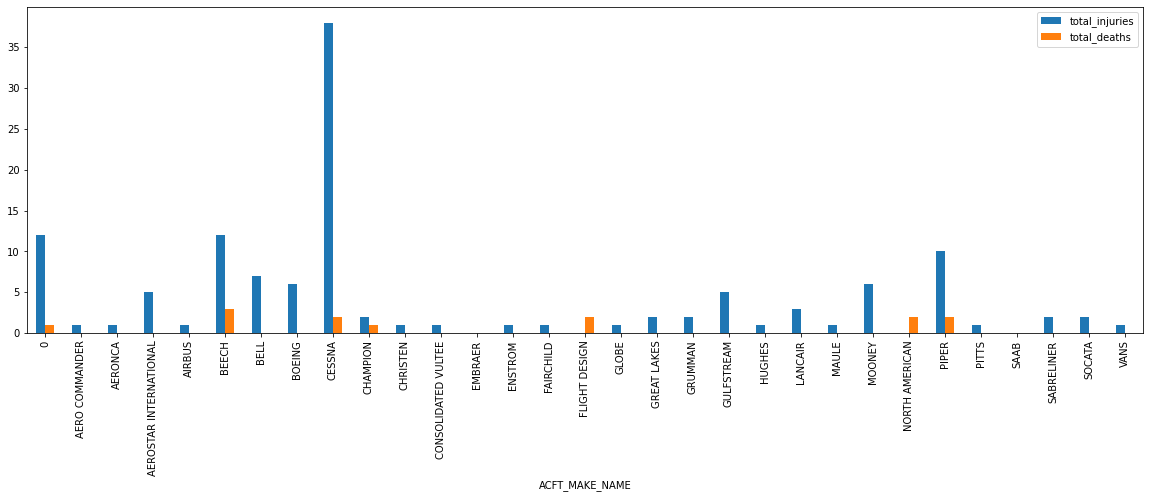

In [12]:
plt.rcParams['figure.figsize']=[20,6]
# df4[['total_injuries']].plot.bar()
# df4[['total_deaths']].plot.bar(color='orange')
# print(df4)

df4.plot.bar()
# print(k)


Now I would like to visualise the number of total accidents and incidents in the total dataframe. This can be done using the pie chart

In [13]:
g3=df.groupby('EVENT_TYPE_DESC')
accident_dataframe=g3.get_group('Accident')
incident_dataframe=g3.get_group('Incident')
(x1,y)=accident_dataframe.shape
(x2,y)=incident_dataframe.shape
print(x1,x2)

27 56


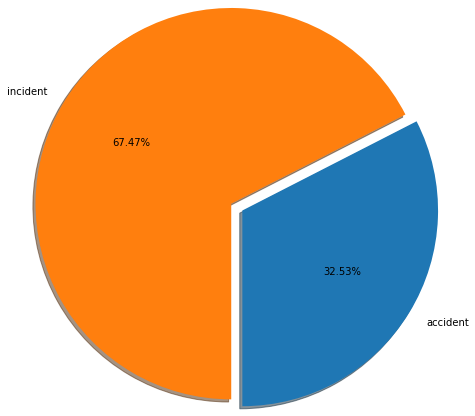

In [14]:
values=[x1,x2]
l=['accident','incident']
plt.pie(values,labels=l,radius=1.5,autopct='%0.2f%%',shadow=True,explode=[0.1,0],startangle=270)
plt.show()

It is observed that the ratio of incidents is more than the ratio of accidents.

Now I would like to find the rate of deaths using pie chart

In [15]:
final_data_frame.fillna({'FATAL_FLAG':'No'},inplace=True)
final_data_frame=final_data_frame[['FATAL_FLAG']]
final_data_frame
g1=final_data_frame.groupby('FATAL_FLAG')

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


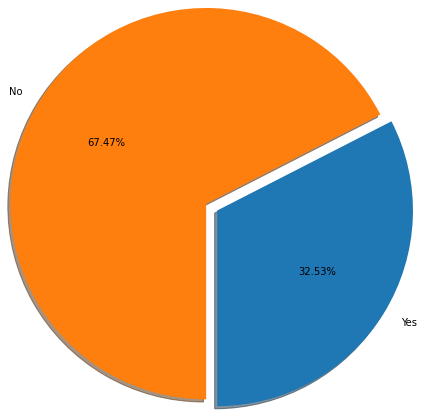

In [16]:
values=[x1,x2]
l=['Yes','No']
plt.pie(values,labels=l,radius=1.5,autopct='%0.2f%%',shadow=True,explode=[0.1,0],startangle=270)
plt.show()

In [17]:
fatal_flagdf=g1.get_group('Yes')
nofatal_flagdf=g1.get_group('No')
(x1,y)=fatal_flag_df.shape
(x2,y)=nofatal_flagdf.shape
print(x1,x2)

8 75


**Unique Observations in the above analysis**:- Actually for the above dataset there are no notebooks currently available but the analysis done was only the observations which has fatal flag as yes and no.But in my notebook I also found the number of occurences of each aircraft. I also have done the sum of injuries and sum of deaths. Then I have found the number of injuries and deaths of each aircraft. For visualaisation I plotted a bar chart. Then after that I found number of accidents and incidents in the dataframe. Again for visualisation I plotted a pie chart. Then after that I also found the number of deaths and non deaths in the dataframe and plotted a chairt. 